In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt 



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 28.6 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emotions.csv")
df.drop(df[df['Emotion']=='shame'].index, inplace=True)
df.drop(df[df['Emotion']=='disgust'].index, inplace=True)

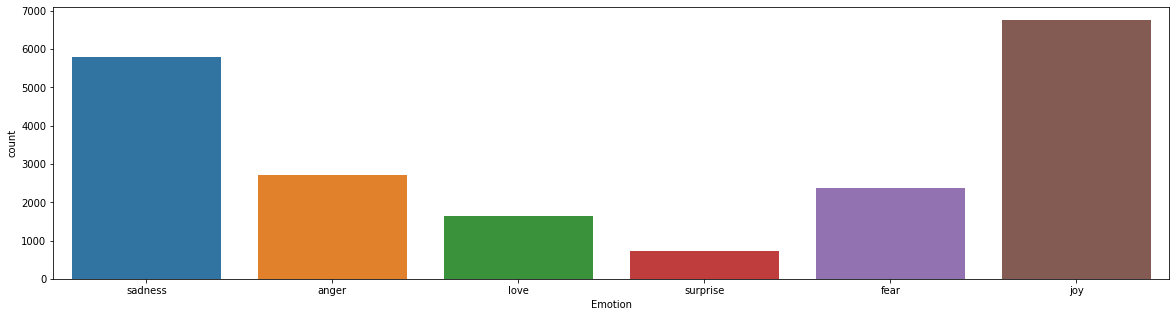

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df)

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet_emotions.csv")

In [ ]:
df2.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df['Emotion'].value_counts()
df2.rename(columns = {'sentiment':'Emotion', 'content':'Text'}, inplace = True)
df2.tail()

,tweet_id,Emotion,Text
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,@mopedronin bullet train from tokyo the gf ...


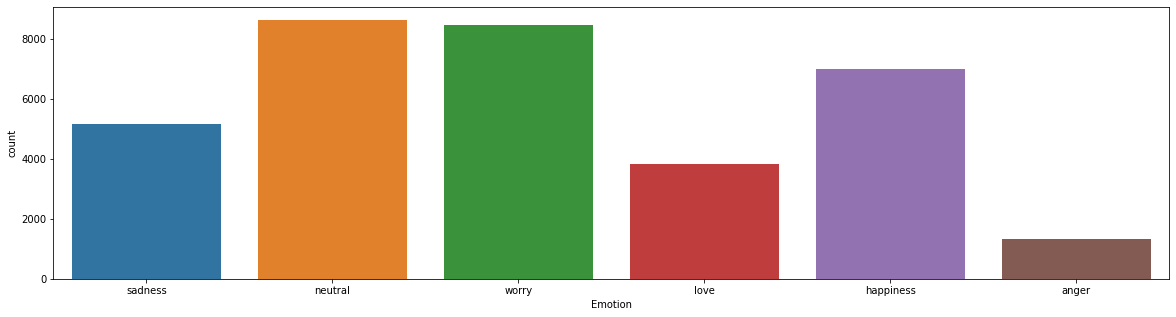

In [ ]:
df2.drop(['tweet_id'],axis=1, inplace=True)
df2.drop(df2[df2['Emotion']=='empty'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='enthusiam'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='boredom'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='relief'].index, inplace=True)
df2.drop(df2[df2['Emotion']=='anger'].index, inplace=True)
pre = {'neutral':'neutral','sadness':'sadness','worry':'worry','love':'love','happiness':'happiness','fun':'happiness','suprise':'suprise','hate':'anger'}
df2['Emotion'] = df2['Emotion'].map(pre)
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df2)

20000 i didnt feel humiliated


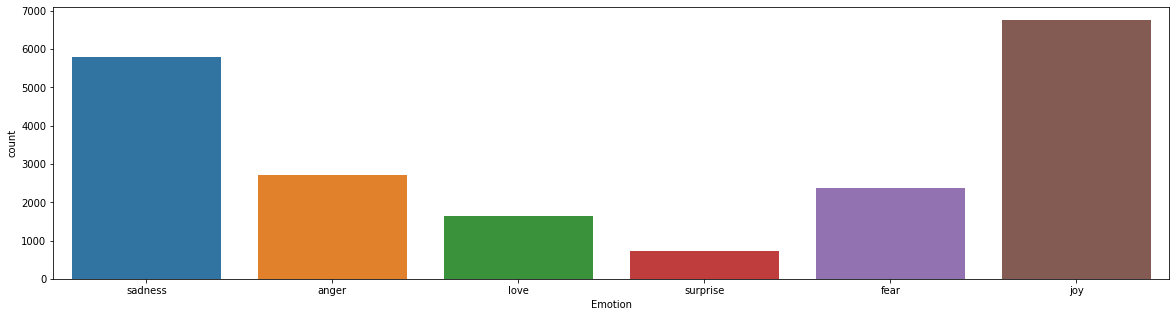

In [ ]:
import fileinput
  

a = []
b = []
for line in fileinput.input(files ='/content/drive/MyDrive/Colab Notebooks/train.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])
for line in fileinput.input(files ='/content/drive/MyDrive/Colab Notebooks/test.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])
for line in fileinput.input(files ='/content/drive/MyDrive/Colab Notebooks/val.txt'):
    s = ""
    i = len(line) - 2
    while line[i] != ';':
        s = line[i] + s
        i -= 1 
    b.append(s)
    a.append(line[0:i])

print(len(b),a[0])
dic = {'Text':a, 'Emotion':b}
df3 = pd.DataFrame(dic)
df3.to_csv('Emotions.csv') 
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df3)

In [ ]:
df_concat = pd.concat([df,df2,df3], axis=0)
df_concat.head()
labels = {}
j = 0
for i in df_concat['Emotion'].unique():
    labels[i] = j
    j += 1
print(labels)
print(df_concat.head())
df_concat.drop(df_concat[df_concat['Emotion']=='happiness'].index, inplace=True)

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5, nan: 6, 'neutral': 7, 'worry': 8, 'happiness': 9}
   Unnamed: 0                                               Text  Emotion
0         0.0                            i didnt feel humiliated  sadness
1         1.0  i can go from feeling so hopeless to so damned...  sadness
2         2.0   im grabbing a minute to post i feel greedy wrong    anger
3         3.0  i am ever feeling nostalgic about the fireplac...     love
4         4.0                               i am feeling grouchy    anger


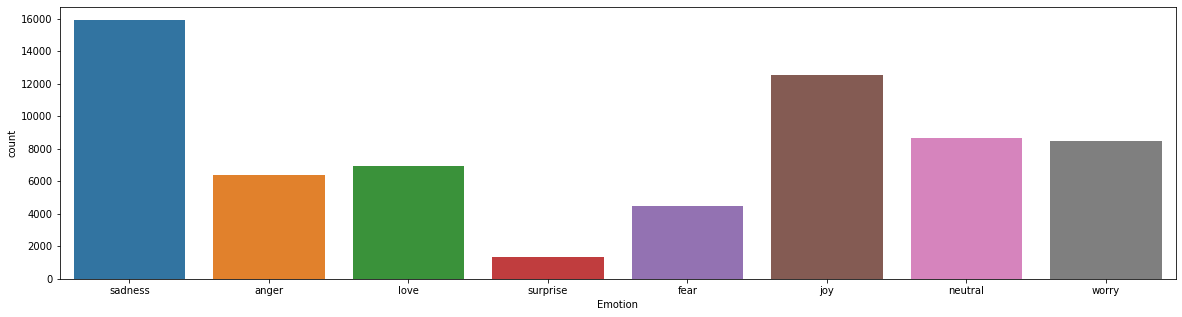

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Emotion',data=df_concat)

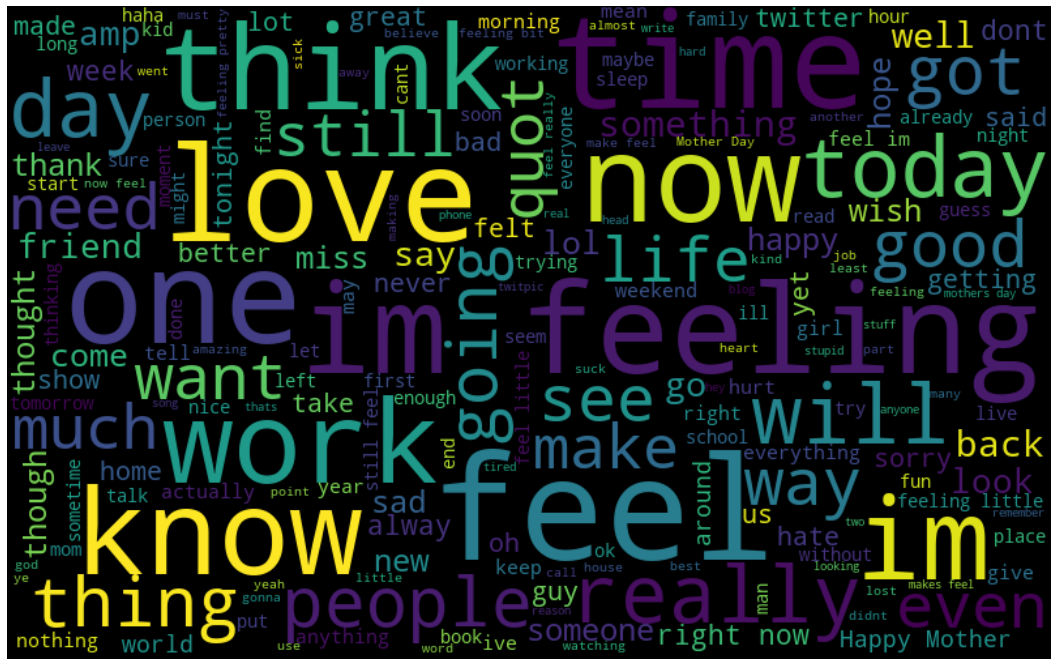

In [ ]:
all_words = ' '.join([text for text in  df_concat['Text']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(20, 12)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df_concat['Clean_Text'] = df_concat['Text'].apply(nfx.remove_userhandles)

In [ ]:
df_concat['Clean_Text'] = df_concat['Clean_Text'].apply(nfx.remove_stopwords)
df_concat['Emotion'] = df_concat['Emotion'].map(labels)

In [ ]:
df_concat = df_concat.sample(frac = 1)
df_concat

,Unnamed: 0,Text,Emotion,Clean_Text
4977,NaN,i could continue feeling awful and crying to a...,0,continue feeling awful crying friends focus wr...
15004,NaN,is confused,6,confused
8859,NaN,@dekhmcclelland One's gone to my husband who's...,8,One's gone husband who's going leave box offic...
10615,NaN,i feel that he is sincere in his feelings for ...,5,feel sincere feelings know care time dont know
13268,NaN,@ego_assassin We are soooo sorry We love ki...,0,soooo sorry love kitties know you.
...,...,...,...,...
6741,NaN,I also think that I'm talking to myself now. O...,0,"think I'm talking now. Okay need bed. BTW, mis..."
5643,NaN,@THE_WOCKEEZ @DonnieWahlberg Don't wanna miss ...,0,wanna miss shows...you guys kick it! Sad say.....
15350,NaN,My spellingis awful on twiiter,7,spellingis awful twiiter
5275,NaN,@_kotenok !! ... maybe they took one look at ...,8,!! ... maybe took look said &quot;That's girl!...


In [ ]:
df_concat = df_concat.sample(frac = 1)
Xfeatures = df_concat['Clean_Text']
ylabels = df_concat['Emotion']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=100)


In [ ]:
ex1 = "I am sad and angry"
accuracy=[]

In [ ]:
pipe_dt = Pipeline([('vect', CountVectorizer(lowercase=False)),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(random_state=100))])

In [ ]:
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [ ]:
pipe_dt.score(x_test,y_test)
a = (100*pipe_dt.score(x_test,y_test))
a = round(a,2)
accuracy.append(a)
print(accuracy)

[68.92]


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3176
           1       0.88      0.81      0.84      1331
           2       0.66      0.65      0.65      1357
           3       0.95      0.93      0.94       274
           4       0.94      0.96      0.95       865
           5       0.94      0.97      0.95      2487
           6       0.13      0.08      0.10       625
           7       0.42      0.48      0.45      1780
           8       0.33      0.35      0.34      1634

    accuracy                           0.69     13529
   macro avg       0.67      0.67      0.67     13529
weighted avg       0.69      0.69      0.69     13529



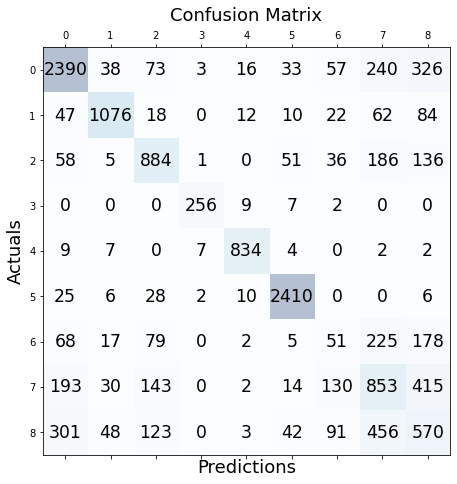

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

y_pred = pipe_dt.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
print(classification_report(y_test,y_pred))
plt.show()


In [ ]:
pipe_rf = Pipeline([('vect', CountVectorizer(lowercase=False)),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(n_estimators = 200, random_state=100))])

In [ ]:
 pipe_rf.fit(x_train,y_train)


Pipeline(steps=[('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=100))])

In [ ]:
pipe_rf.score(x_test,y_test)
a = (100*pipe_rf.score(x_test,y_test))
a = round(a,2)
accuracy.append(a)
print(accuracy)

[68.92, 71.5]


              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3176
           1       0.91      0.80      0.85      1331
           2       0.73      0.67      0.70      1357
           3       0.93      0.91      0.92       274
           4       0.95      0.97      0.96       865
           5       0.94      0.99      0.96      2487
           6       0.25      0.04      0.07       625
           7       0.43      0.65      0.52      1780
           8       0.36      0.37      0.37      1634

    accuracy                           0.71     13529
   macro avg       0.70      0.68      0.68     13529
weighted avg       0.72      0.71      0.71     13529



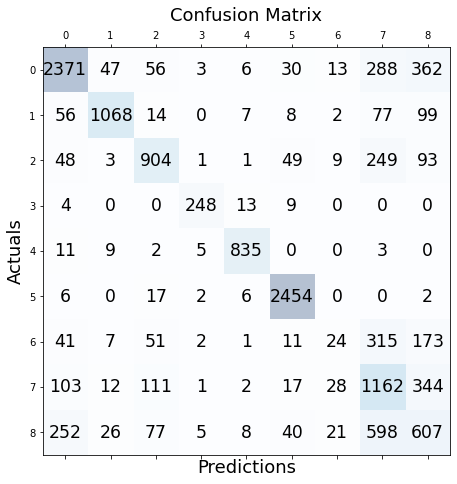

In [ ]:
y_pred = pipe_rf.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)



fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
print(classification_report(y_test,y_pred))
plt.show()

In [ ]:
label[int(pipe_rf.predict(['hate you']))]


'anger'

In [ ]:
from xgboost import XGBClassifier
pipe_xg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', XGBClassifier(n_estimators=300,random_state=100))])

In [ ]:
pipe_xg.fit(x_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(n_estimators=300, objective='multi:softprob',
                               random_state=100))])

In [ ]:
pipe_xg.score(x_test,y_test)
a = (100*pipe_xg.score(x_test,y_test))
a = round(a,2)
accuracy.append(a)
print(accuracy)

[68.92, 71.5, 66.61]


In [ ]:
label[int(pipe_xg.predict([' hate you']))]

'worry'

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      3176
           1       0.89      0.71      0.79      1331
           2       0.72      0.58      0.64      1357
           3       0.83      0.78      0.81       274
           4       0.88      0.87      0.88       865
           5       0.87      0.91      0.89      2487
           6       0.38      0.02      0.04       625
           7       0.38      0.77      0.51      1780
           8       0.36      0.35      0.36      1634

    accuracy                           0.67     13529
   macro avg       0.69      0.63      0.63     13529
weighted avg       0.71      0.67      0.66     13529



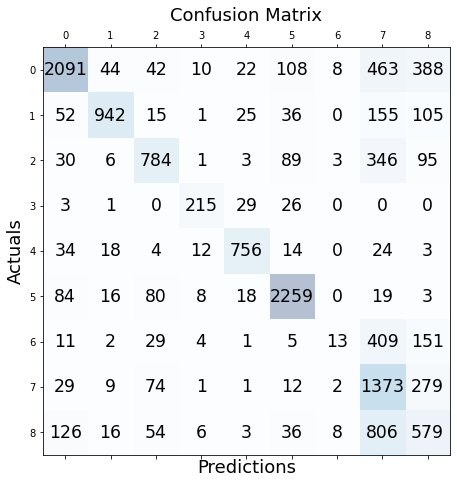

In [ ]:
y_pred = pipe_xg.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)



fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
print(classification_report(y_test,y_pred))
plt.show()

In [ ]:
pipe_svm = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', svm.SVC())])

In [ ]:
accuracy=[69.02, 71.39, 66.85]
pipe_svm.score(x_test,y_test)
a = (100*pipe_svm.score(x_test,y_test))
a = round(a,2)
accuracy.append(a)
print(accuracy)

[68.84, 71.94]


YellowbrickTypeError: ignored

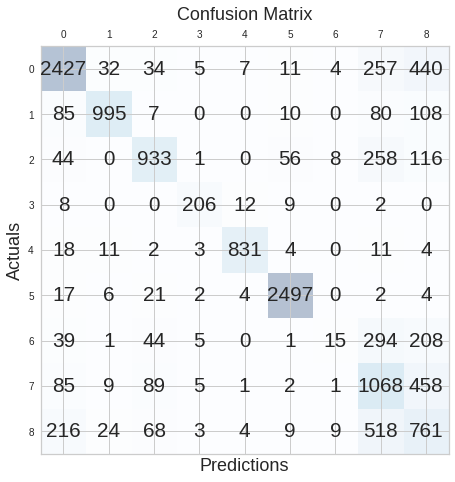

In [ ]:
y_pred = pipe_svm.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)



fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)


plt.show()

In [ ]:
label[int(pipe_svm.predict([' hate you']))]

'anger'

In [ ]:
pipe_nb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [ ]:
pipe_nb.score(x_test,y_test)
a = (100*pipe_nb.score(x_test,y_test))
a = round(a,2)
accuracy.append(a)
print(accuracy)

[69.5, 72.2, 67.07, 72.07, 53.3, 52.52]


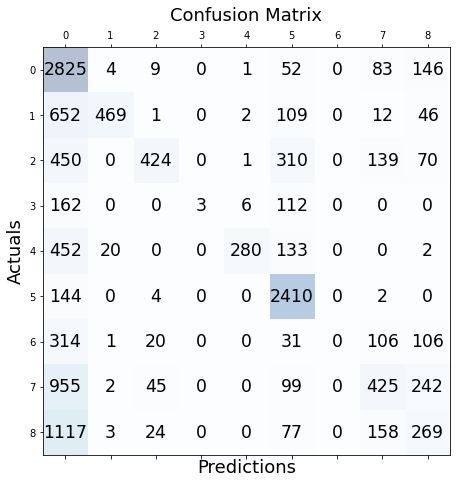

In [ ]:
y_pred = pipe_nb.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)



fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
label[int(pipe_svm.predict([' hate you']))]

'anger'

[69.5, 72.2, 67.07, 72.07, 53.3]


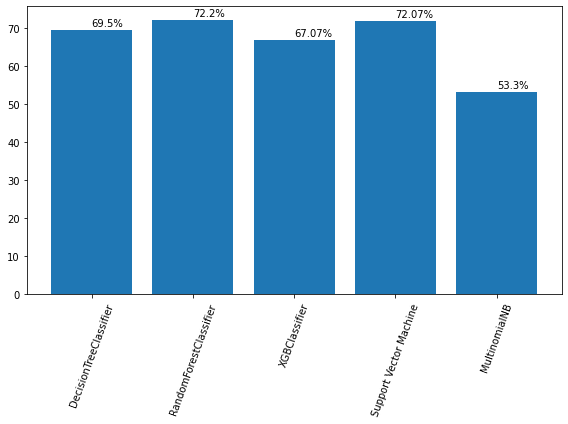

In [ ]:
accuracy=[69.5, 72.2, 67.07, 72.07, 53.3]
cls_name = ["DecisionTreeClassifier","RandomForestClassifier","XGBClassifier","Support Vector Machine","MultinomialNB"]

print(accuracy)
plt.figure(figsize=(8,6))
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)
for index,data in enumerate(accuracy):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()